## Dependencias

In [ ]:
!pip show pandas

Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials 

In [ ]:
!pip install pandas==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 27.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
import pandas as pd

## Abrir la data

In [ ]:
# Abre la data y se salta la primera fila
data_excel = pd.read_excel("/content/Data.xlsx", skiprows=1, usecols = ['MARRIED', 'FEMALE', 'EDUC'] )

In [ ]:
data_excel

,MARRIED,FEMALE,EDUC
0,0,1,11
1,1,1,12
2,0,0,11
3,1,0,8
4,1,0,12
...,...,...,...
521,1,1,16
522,0,1,10
523,1,0,15
524,1,0,16


In [ ]:
# Revisar la cabecera de la data
data_excel.head()

,WAGE,MARRIED,FEMALE,EDUC,EXPER,EXPERSQ,TENURE,TENURSQ
0,3.10,0,1,11,2,4,0,0
1,3.24,1,1,12,22,484,2,4
2,3.00,0,0,11,2,4,0,0
3,6.00,1,0,8,44,1936,28,784
4,5.30,1,0,12,7,49,2,4


In [ ]:
# Revisar la cola
data_excel.tail()

,WAGE,MARRIED,FEMALE,EDUC,EXPER,EXPERSQ,TENURE,TENURSQ
521,15.00,1,1,16,14,196,2,4
522,2.27,0,1,10,2,4,0,0
523,4.67,1,0,15,13,169,18,324
524,11.56,1,0,16,5,25,1,1
525,3.50,0,1,14,5,25,4,16


In [ ]:
# Muestra de la data
data_excel.sample(5)

,WAGE,MARRIED,FEMALE,EDUC,EXPER,EXPERSQ,TENURE,TENURSQ
319,4.00,1,0,10,34,1156,12,144
160,2.83,0,0,10,1,1,0,0
406,2.92,0,1,9,49,2401,0,0
288,2.00,0,0,9,2,4,0,0
280,6.25,1,1,15,12,144,4,16


In [ ]:
# Muestra con estado de aleatoriedad fijado
data_excel.sample(5, random_state=42)

,WAGE,MARRIED,FEMALE,EDUC,EXPER,EXPERSQ,TENURE,TENURSQ
311,3.33,1,1,12,36,1296,8,64
397,4.29,1,1,12,47,2209,25,625
6,11.25,0,0,18,15,225,7,49
184,5.00,0,1,12,14,196,11,121
78,8.45,1,0,12,19,361,13,169


- Al revisar cinco muestras de la data, se encontro que los valores de las columnas "SQ" corresponden a valroes elevados al cuadrado de las columnas anteriores.
- De la columna "FEMALE" (que signifca femenino en ingles), se puede inferir que si el valor es "0" el sujeto no es una mujer. De lo contrario, si el valor es "1", se trata de una mujer.
- De la metadata, se observa que el salario indicado es por hora. No se declara explicitamente la moneda en el cual el salario es pagado.

In [ ]:
data_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WAGE     526 non-null    float64
 1   MARRIED  526 non-null    int64  
 2   FEMALE   526 non-null    int64  
 3   EDUC     526 non-null    int64  
 4   EXPER    526 non-null    int64  
 5   EXPERSQ  526 non-null    int64  
 6   TENURE   526 non-null    int64  
 7   TENURSQ  526 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 33.0 KB


A partir del resumen de la data, se observa que no hay valores nulos.

## 1. Estadisticas Descriptivas

In [ ]:
data_excel.describe()

,WAGE,MARRIED,FEMALE,EDUC,EXPER,EXPERSQ,TENURE,TENURSQ
count,526.000000,526.000000,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000
mean,5.896103,0.608365,0.479087,12.562738,17.01711,473.435361,5.104563,78.150190
std,3.693086,0.488580,0.500038,2.769022,13.57216,616.044772,7.224462,199.434664
min,0.530000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000
25%,3.330000,0.000000,0.000000,12.000000,5.00000,25.000000,0.000000,0.000000
50%,4.650000,1.000000,0.000000,12.000000,13.50000,182.500000,2.000000,4.000000
75%,6.880000,1.000000,1.000000,14.000000,26.00000,676.000000,7.000000,49.000000
max,24.980000,1.000000,1.000000,18.000000,51.00000,2601.000000,44.000000,1936.000000


In [ ]:
data_excel.corr()

,WAGE,MARRIED,FEMALE,EDUC,EXPER,EXPERSQ,TENURE,TENURSQ
WAGE,1.000000,0.228817,-0.340098,0.405903,0.112903,0.030238,0.346890,0.267419
MARRIED,0.228817,1.000000,-0.166128,0.068881,0.316984,0.217289,0.239889,0.166822
FEMALE,-0.340098,-0.166128,1.000000,-0.085029,-0.041626,-0.027860,-0.197910,-0.175623
EDUC,0.405903,0.068881,-0.085029,1.000000,-0.299542,-0.331256,-0.056173,-0.069106
EXPER,0.112903,0.316984,-0.041626,-0.299542,1.000000,0.960971,0.499291,0.422942
EXPERSQ,0.030238,0.217289,-0.027860,-0.331256,0.960971,1.000000,0.459223,0.413950
TENURE,0.346890,0.239889,-0.197910,-0.056173,0.499291,0.459223,1.000000,0.921564
TENURSQ,0.267419,0.166822,-0.175623,-0.069106,0.422942,0.413950,0.921564,1.000000


In [ ]:
data_excel.corr(method='spearman')

,WAGE,MARRIED,FEMALE,EDUC,EXPER,EXPERSQ,TENURE,TENURSQ
WAGE,1.000000,0.277947,-0.382900,0.457769,0.174416,0.174416,0.380787,0.380787
MARRIED,0.277947,1.000000,-0.166128,0.107272,0.398520,0.398520,0.294687,0.294687
FEMALE,-0.382900,-0.166128,1.000000,-0.095442,-0.049644,-0.049644,-0.169835,-0.169835
EDUC,0.457769,0.107272,-0.095442,1.000000,-0.198994,-0.198994,0.048477,0.048477
EXPER,0.174416,0.398520,-0.049644,-0.198994,1.000000,1.000000,0.487247,0.487247
EXPERSQ,0.174416,0.398520,-0.049644,-0.198994,1.000000,1.000000,0.487247,0.487247
TENURE,0.380787,0.294687,-0.169835,0.048477,0.487247,0.487247,1.000000,1.000000
TENURSQ,0.380787,0.294687,-0.169835,0.048477,0.487247,0.487247,1.000000,1.000000


In [ ]:
# Heatmap / mapa de calor
import matplotlib.pyplot as plt
import seaborn as sns

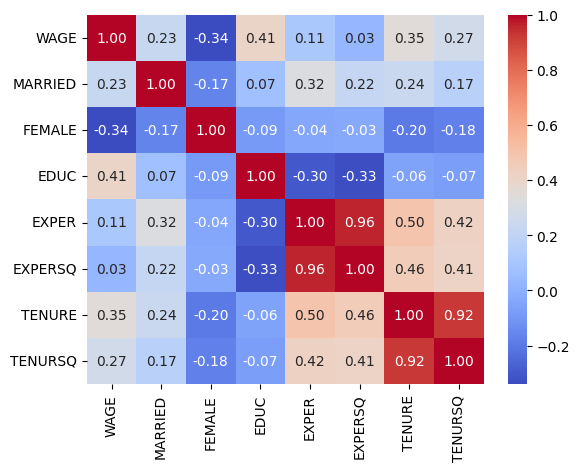

In [ ]:
correlacion = data_excel.corr()
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()